<a href="https://colab.research.google.com/github/m0bi/housing_prices_prediction/blob/main/Week3__hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Project


In [1398]:
import numpy as np
import pandas as pd
import folium 
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sb
import sys
from scipy.stats import zscore
import branca
import branca.colormap as cm
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1399]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2=np.sum((self.X-X[i])**2, axis=1)
      idx = np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idx])+epsilon)
      y_slice = self.y[idx]
      y_hat[i] = np.bincount(y_slice.astype("int"), weights=gamma_k).argmax()

    return y_hat

# K Means Algorithm

### Euclidean Distance: $ D((a_1, b_1),(a_2, b_2)) = \sqrt {(a_1 - b_1)^2 + (a_2 - b_2)^2} $

### For data vector x and centroids C: $ argmin(c_i\in C: D(c_i, x)) $

### Finding new centroid where $ S_i $ is the set of $ s_1\ldots s_i $ clustered points and $ c_i $ is their centroid: $ c_i = (1/|S_i|)\sum_{x_i\in S_i} x_i $

In [1400]:
class KMeans:
    def __init__(self, K=2, tolerance=0.001, max_iterations=300, gamma=1e-3):
        self.K = K
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.gamma = gamma

    def fit(self, X):

        self.cent = {}

        for i in range(self.K):
            self.cent[i] = X[i]

        for i in range(self.max_iterations):
            self.clf = {}

            for i in range(self.K):
                self.clf[i] = []

            for features in X:
                distance = [np.linalg.norm(features-self.cent[centroid]) for centroid in self.cent]
                classification = distance.index(min(distance))
                self.clf[classification].append(features)

            prev_cent = dict(self.cent)

            for classification in self.clf:
                self.cent[classification] = np.average(self.clf[classification],axis=0)

            optimized = True

            for c in self.cent:

                prev_centroids = dict(self.cent)

                original_centroid = prev_cent[c]
                current_centroid = self.cent[c]
                if np.sum((current_centroid-original_centroid)/(original_centroid + self.gamma)*100.0) > self.tolerance:
                    optimized = False

            if optimized:
                break

    def predict(self, X):
        clf = []
        for i in range(len(X)):
          distance = [np.linalg.norm(X[i]-self.cent[centroid]) for centroid in self.cent]
          clf.append(np.argmin(np.array(distance)))
        return clf

In [1401]:
class continuous():

  def create(self, D, N, seed=None, r=20):
    np.random.seed(seed)
    self.X = np.linspace(0, r, N).reshape(N, D)
    self.y = np.sqrt(self.X) + np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2)+np.random.randn(N,1)*0.2)

    return self.X, self.y
  
  def show(self):

    plt.figure()
    plt.scatter(self.X, self.y)


In [1402]:
km = KMeans(K=4, max_iterations=1000)
myDat = continuous()
X, y = myDat.create(1, 200, seed=42)
X = np.array(X)
km.fit(X)
km.predict(X)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [1403]:
np.argmin(np.array([10.452261306532664, 10.35175879396985, 10.251256281407036, 0.3015075376884422]))

3

In [1404]:
class OurLinearRegression():

  def OLS(self, Y, Y_hat, N):
    return (1/(2*N)*np.sum((Y-Y_hat)**2))

  def fit(self, X, y, epochs=1e3, eta=1e-3, show_curve = False, lambd=0, p = 1):
    epochs = int(epochs)
    N, D = X.shape
    Y = y 

    self.W = np.random.randn(D)
    J = np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      mat = (X.T@(Y_hat - Y))[0]
      J[epoch] = self.OLS(Y, Y_hat, N) + (lambd/(p*N))*np.linalg.norm(self.W, ord = p, keepdims=True)
      self.W -= eta*(1/N)*(mat + (1/N)*(lambd*np.abs(self.W)**(p - 1)*np.sign(self.W)))
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def predict(self, X):
    return X@self.W

In [1405]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y
  
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

In [1406]:
def r2(y_true, y_pred):  
    correlation_matrix = np.corrcoef(y_true, y_pred)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared


In [1407]:
df = pd.read_csv("/content/drive/MyDrive/boston_clean")

In [1408]:
df.head()

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,2,3054672,15.250595,85646,-111.040707,31.594844,7.443078,9.257510,1997,2,3.0,7.876073,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0.000000
1,4,21306357,15.042648,85750,-110.813768,32.285162,1.437463,9.641733,1995,4,6.0,8.763584,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",4.025352
2,8,21324646,15.123844,85718,-110.912156,32.343601,2.045109,10.130439,2002,5,7.0,8.563886,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1,"Carpet, Natural Stone, Wood, Other",6.045005
3,10,21900396,14.836709,85640,-111.045441,31.562121,4.998428,8.899916,1935,5,5.0,8.530702,5.0,"Freezer, Refrigerator, Appliance Color: Stainl...",5,"Concrete, Natural Stone, Wood",0.000000
4,12,21217839,14.557448,85637,-110.736202,31.721347,3.421000,9.369393,1995,6,7.0,8.772610,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4,"Mexican Tile, Natural Stone, Wood",0.000000


In [1409]:
df = df.drop(["Unnamed: 0", "MLS"], axis=1)

In [1410]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,15.250595,85646,-111.040707,31.594844,7.443078,9.257510,1997,2,3.0,7.876073,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0.000000
1,15.042648,85750,-110.813768,32.285162,1.437463,9.641733,1995,4,6.0,8.763584,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",4.025352
2,15.123844,85718,-110.912156,32.343601,2.045109,10.130439,2002,5,7.0,8.563886,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1,"Carpet, Natural Stone, Wood, Other",6.045005
3,14.836709,85640,-111.045441,31.562121,4.998428,8.899916,1935,5,5.0,8.530702,5.0,"Freezer, Refrigerator, Appliance Color: Stainl...",5,"Concrete, Natural Stone, Wood",0.000000
4,14.557448,85637,-110.736202,31.721347,3.421000,9.369393,1995,6,7.0,8.772610,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4,"Mexican Tile, Natural Stone, Wood",0.000000


In [1411]:
df.shape

(4866, 15)

In [1412]:
def quantile_cut(data, column):
  def low_quant(x):
    if x < data[column].quantile(0.5):
      x = data[column].quantile(0.5)
      return x
    else:
      return x
  def high_quant(x):
    if x > data[column].quantile(0.95):
      x = data[column].quantile(0.95)
      return x
    else:
      return x
  data[column] = data[column].apply(low_quant)
  data[column] = data[column].apply(high_quant)
  return data 

In [1413]:
df = quantile_cut(df, "lot_acres")
df = quantile_cut(df, "taxes")
df = quantile_cut(df, "sqrt_ft")
df = quantile_cut(df, "HOA")

In [1414]:
#8612 S 45th Dr Levine, AZ
predictor = {
    "sold_price": [np.log1p(650000)],
    "zipcode": [85324],
    "longitude": [-112.15918],
    "latitude": [34.05669],
    "lot_acres": [np.log1p(0.41322314)],
    "taxes": [np.log1p(8.6)],
    "year_built": [1997],
    "bedrooms": [3],
    "bathrooms": [4],
    "sqrt_ft": [np.log1p(2812)],
    "garage": [3],
    "kitchen_features": ["string"],
    "fireplaces": [1],
    "floor_covering": ["string"],
    "HOA": [0.0]
}
pred = pd.DataFrame(predictor)
df = df.append(pred, ignore_index=True)

In [1415]:
df.shape

(4867, 15)

In [1416]:
ppsqft = np.expm1(df["sold_price"]) / np.expm1(df["sqrt_ft"])
ppsqft

0       1205.164993
1        641.762688
2        706.376480
3        547.960924
4        395.052440
5        413.864461
6        860.832138
7        746.054519
8        470.300524
9        746.054519
10       526.736586
11       746.054519
12       451.488503
13       366.834408
14       516.018061
15       746.054519
16       442.082492
17       717.360115
18       442.082492
19       395.052440
20       357.428398
21       385.646429
22       404.458450
23       413.864461
24       509.613157
25       443.280274
26       470.894581
27       438.508208
28       473.493402
29       413.394160
30       516.499283
31       341.134470
32       616.929699
33       376.146359
34       356.633381
35       607.618938
36       375.299818
37       503.905266
38       371.592539
39       559.540890
40       333.913372
41       375.299818
42       329.210367
43       338.616377
44       382.577987
45       338.616377
46       413.661434
47       282.180314
48       337.675776
49       487.804878


In [1417]:
ppsqft_binned = pd.qcut(x=ppsqft, q=10, labels=False)
ppsqft_binned

0       9
1       9
2       9
3       9
4       9
5       9
6       9
7       9
8       9
9       9
10      9
11      9
12      9
13      9
14      9
15      9
16      9
17      9
18      9
19      9
20      9
21      9
22      9
23      9
24      9
25      9
26      9
27      9
28      9
29      9
30      9
31      9
32      9
33      9
34      9
35      9
36      9
37      9
38      9
39      9
40      9
41      9
42      9
43      9
44      9
45      9
46      9
47      9
48      9
49      9
50      9
51      9
52      9
53      9
54      9
55      9
56      9
57      9
58      9
59      9
60      9
61      9
62      9
63      9
64      9
65      9
66      9
67      9
68      9
69      9
70      9
71      9
72      9
73      9
74      9
75      9
76      9
77      9
78      9
79      9
80      9
81      9
82      9
83      9
84      9
85      9
86      9
87      9
88      9
89      9
90      9
91      9
92      9
93      9
94      9
95      9
96      9
97      9
98      9
99      9


In [1418]:
df["ppsqft_bin"] = ppsqft_binned

In [1419]:
df["floor_covering"] = df["floor_covering"].astype("category")

In [1420]:
df["floor_covering"] = df["floor_covering"].cat.codes

In [1421]:
df["floor_covering"].value_counts()

1      1233
113     568
64      254
156     241
208     234
100     210
121     194
255     143
30      116
206     114
263      97
240      90
70       83
125      67
2        55
23       44
35       40
227      40
107      40
149      34
269      32
157      30
101      29
251      27
212      27
292      26
37       25
167      24
77       23
19       22
84       21
186      21
188      20
150      17
216      15
114      15
28       14
61       14
73       14
243      14
184      13
79       13
0        13
131      12
14       12
138      10
217      10
179      10
102       9
174       9
132       9
190       8
5         8
8         8
122       8
245       7
80        7
280       7
241       7
219       7
65        6
293       6
214       6
148       5
228       5
180       4
146       4
7         4
24        4
279       4
93        4
31        4
165       4
103       4
205       4
133       4
289       3
181       3
153       3
264       3
260       3
256       3
137       3
74  

In [1422]:
def coding_func(x):
  good_cat = [1, 113, 64, 156, 208, 100, 121, 255, 30, 206, 240, 70, 125, 2, 23, 107, 227, 35]

  if x in good_cat:
    pass
  else:
    x = 0
  return x


In [1423]:
df["floor_covering"] = df["floor_covering"].apply(coding_func)

In [1424]:
df["floor_covering"].value_counts()

1      1233
0      1101
113     568
64      254
156     241
208     234
100     210
121     194
255     143
30      116
206     114
240      90
70       83
125      67
2        55
23       44
227      40
35       40
107      40
Name: floor_covering, dtype: int64

In [1425]:
df["kitchen_features"].dtype

dtype('O')

In [1426]:
df["kitchen_features"] = df["kitchen_features"].astype("category")

In [1427]:
df["kitchen_features"] = df["kitchen_features"].cat.codes

In [1428]:
df["kitchen_features"].value_counts()

1710    1689
1679     268
1715     179
153      178
1383     122
1767      96
1697      68
1681      68
1770      32
1709      27
1813      27
1759      24
1394      19
123       19
1384      19
444       17
147       15
155       14
1764      13
1800      12
150       10
1761      10
1819       8
161        7
1499       6
1766       6
1794       6
1678       6
1817       5
1637       5
1638       5
148        5
1109       5
1674       4
826        4
1381       4
1382       4
917        4
1801       4
1820       4
839        3
1506       3
914        3
1751       3
1701       3
1720       3
1563       3
1814       3
882        3
1786       3
1392       3
1675       3
1798       2
260        2
1183       2
1498       2
397        2
1606       2
1051       2
517        2
1807       2
1455       2
1468       2
814        2
929        2
827        2
848        2
166        2
203        2
973        2
1624       2
645        2
1371       2
820        2
707        2
808        2
1707       2

In [1429]:
def coding_func(x):
  good_cat = [1710, 1679, 1715, 153, 1383, 1767, 1681, 1697, 1770, 1709, 1813, 1759]

  if x in good_cat:
    pass
  else:
    x = 0
  return x


In [1430]:
df["kitchen_features"] = df["kitchen_features"].apply(coding_func)

In [1431]:
df["kitchen_features"].value_counts()

0       2089
1710    1689
1679     268
1715     179
153      178
1383     122
1767      96
1697      68
1681      68
1770      32
1813      27
1709      27
1759      24
Name: kitchen_features, dtype: int64

In [1432]:
df["zipcode"].value_counts()

85718    1286
85750     760
85755     457
85749     391
85658     285
85737     280
85742     159
85739     153
85745     146
85716     104
85704      95
85715      90
85719      75
85743      74
85641      66
85748      58
85646      54
85614      50
85712      39
85623      30
85622      29
85730      27
85637      23
85747      15
85629      14
85701      13
85705      12
85630       9
85624       9
85611       8
85619       6
85711       6
85645       6
85621       4
85640       4
85615       3
85648       3
85710       2
85601       2
85643       2
85610       2
85602       2
85605       1
85609       1
85625       1
86024       1
85713       1
85901       1
85929       1
86323       1
85324       1
85603       1
85935       1
85118       1
85638       1
85541       1
Name: zipcode, dtype: int64

In [1433]:
def coding_func(x):
  good_cat = [85718, 85750, 85755, 85749, 85658, 85737, 85742, 85739, 85745, 85716, 85704, 85715, 85719, 85743, 85641, 85748, 85646, 85614]

  if x in good_cat:
    pass
  else:
    x = 0
  return x

In [1434]:
df["zipcode"] = df["zipcode"].apply(coding_func)

In [1435]:
df["zipcode"].value_counts()

85718    1286
85750     760
85755     457
85749     391
85658     285
0         284
85737     280
85742     159
85739     153
85745     146
85716     104
85704      95
85715      90
85719      75
85743      74
85641      66
85748      58
85646      54
85614      50
Name: zipcode, dtype: int64

In [1436]:
def hoa_bool(x):
  if x == 0:
    return 0
  else:
    return 1

In [1437]:
df["HOA_bool"] = df["HOA"].apply(hoa_bool)

In [1438]:
df["HOA_bool"].value_counts()

1    4866
0       1
Name: HOA_bool, dtype: int64

In [1439]:
def ppsqft(x):
  return np.expm1(x["sold_price"]) / np.expm1(x["sqrt_ft"])

In [1440]:
df["price_sqft"] = np.expm1(df["sold_price"]) / np.expm1(df["sqrt_ft"])

In [1441]:
#df["price_sqft"]
df.iloc[-1:]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,ppsqft_bin,HOA_bool,price_sqft
4866,13.384729,0,-112.15918,34.05669,0.345873,2.261763,1997,3,4.0,7.942007,3.0,0,1,0,0.0,8,0,231.152205


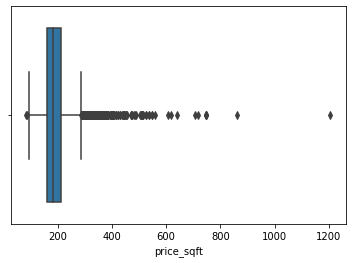

In [1442]:
sb.boxplot(x="price_sqft", data=df);
plt.savefig("/content/drive/MyDrive/ppsf_skewed")

In [1443]:
df["year_built"].value_counts()

2006    245
2007    232
2002    229
2005    225
2004    196
2003    179
2001    176
1999    168
2000    147
1998    139
2008    129
1994    123
1993    120
1996    117
1997    108
1995    104
1987     94
1988     86
1992     84
2014     83
2017     80
2018     79
1991     74
2013     72
2016     65
2009     63
1990     63
1989     61
1985     60
1986     59
2015     56
1980     56
1984     53
1979     50
1978     50
1977     48
2012     44
1982     41
1981     40
1983     39
2010     37
1976     36
1972     32
2019     32
2011     31
1969     30
1963     29
1974     29
1968     28
1973     27
1965     25
1970     25
1966     21
1971     21
1967     18
1959     17
1964     17
1960     17
1961     15
1955     13
1953     13
1975     13
1936     13
1951     12
1958     10
1935     10
1948     10
1962     10
1941      9
1938      9
1954      9
1937      8
1957      8
1949      8
1956      8
1946      8
1947      6
1929      4
1952      4
1922      4
1930      4
1934      4
1940      3
1932

In [1444]:
df["year_built"] = df["year_built"].astype("category")

In [1445]:
def good_years(x):
  gy = [2006, 2007, 2002, 2005, 2004, 2003, 2001, 1999, 2000, 1998, 2008, 1994, 1993, 1996, 1997, 1995, 1987, 1988, 1992, 2014, 2017, 2018, 1991, 2013, 2016, 2009, 1990, 1989, 1985, 1986, 2015, 1980, 1984, 1979, 1978]
  if x in gy:
    pass
  else:
    x = 0
  return x

In [1446]:
df["year_built"] = df["year_built"].apply(good_years)

In [1447]:
df["year_built"].value_counts()

0       942
2006    245
2007    232
2002    229
2005    225
2004    196
2003    179
2001    176
1999    168
2000    147
1998    139
2008    129
1994    123
1993    120
1996    117
1997    108
1995    104
1987     94
1988     86
1992     84
2014     83
2017     80
2018     79
1991     74
2013     72
2016     65
2009     63
1990     63
1989     61
1985     60
1986     59
1980     56
2015     56
1984     53
1978     50
1979     50
Name: year_built, dtype: int64

In [1448]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,ppsqft_bin,HOA_bool,price_sqft
0,15.250595,85646,-111.040707,31.594844,1.874871,9.257510,1997,2,3.0,8.156510,0.0,1697,5,0,3.828641,9,1,1205.164993
1,15.042648,85750,-110.813768,32.285162,1.437463,9.433144,1995,4,6.0,8.578617,3.0,1710,5,70,4.025352,9,1,641.762688
2,15.123844,85718,-110.912156,32.343601,1.874871,9.433144,2002,5,7.0,8.563886,3.0,0,1,0,5.421464,9,1,706.376480
3,14.836709,0,-111.045441,31.562121,1.874871,8.899916,0,5,5.0,8.530702,5.0,0,5,0,3.828641,9,1,547.960924
4,14.557448,0,-110.736202,31.721347,1.874871,9.369393,1995,6,7.0,8.578617,3.0,1710,4,0,3.828641,9,1,395.052440


In [1449]:
lot_acres = df["lot_acres"]
df.drop(["lot_acres"], axis=1, inplace=True)
df = pd.get_dummies(df, columns=["year_built", "bedrooms", "bathrooms", "garage", "kitchen_features", "fireplaces", "floor_covering"])
df["lot_acres"] = lot_acres
df.head()

,sold_price,zipcode,longitude,latitude,taxes,sqrt_ft,HOA,ppsqft_bin,HOA_bool,price_sqft,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres
0,15.250595,85646,-111.040707,31.594844,9.257510,8.156510,3.828641,9,1,1205.164993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871
1,15.042648,85750,-110.813768,32.285162,9.433144,8.578617,4.025352,9,1,641.762688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.437463
2,15.123844,85718,-110.912156,32.343601,9.433144,8.563886,5.421464,9,1,706.376480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871
3,14.836709,0,-111.045441,31.562121,8.899916,8.530702,3.828641,9,1,547.960924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871
4,14.557448,0,-110.736202,31.721347,9.369393,8.578617,3.828641,9,1,395.052440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871


In [1450]:
df.shape

(4867, 133)

In [1451]:
mean_std={}
for var in df[["sold_price", "taxes", "sqrt_ft", "HOA", "price_sqft"]].columns:
    mean_std[var]=(df[var].mean(), df[var].std())
mean_std["lot_acres"] = np.mean(lot_acres), np.std(lot_acres)


In [1452]:
df["lot_acres"] = lot_acres
lot_acres

0       1.874871
1       1.437463
2       1.874871
3       1.874871
4       1.874871
5       1.036737
6       1.467978
7       1.467978
8       0.810930
9       1.467978
10      1.874871
11      1.467978
12      1.486140
13      1.874871
14      0.683097
15      0.683097
16      1.874871
17      1.874871
18      0.936093
19      0.698135
20      0.770108
21      1.439835
22      1.068153
23      1.163151
24      1.874871
25      1.874871
26      0.683097
27      0.815365
28      0.683097
29      0.760806
30      1.874871
31      1.874871
32      1.874871
33      0.737164
34      0.837248
35      0.683097
36      0.765468
37      1.874871
38      1.874871
39      1.519513
40      0.683097
41      1.057790
42      0.797507
43      0.883768
44      1.088562
45      1.837370
46      0.943906
47      1.638997
48      0.683097
49      1.874871
50      0.832909
51      0.774727
52      1.570697
53      0.737164
54      0.683097
55      0.732368
56      0.683097
57      1.549688
58      0.7654

In [1453]:
def reverse_zscore(pandas_series, mean, std):
    x=pandas_series*std+mean
    return x

#for var in df[["sold_price", "lot_acres", "taxes", "sqrt_ft", "HOA", "price_sqft"]].columns:
#    _mean, _std = mean_std[var]
#    df[var] = reverse_zscore(df[var], _mean, _std)

In [1454]:
df["sold_price"] = zscore(df["sold_price"])

In [1455]:
df["sold_price"].iloc[0:5]

0    6.177660
1    5.447172
2    5.732399
3    4.723735
4    3.742734
Name: sold_price, dtype: float64

In [1456]:
df["sold_price"].describe()

count    4.867000e+03
mean    -9.954642e-15
std      1.000103e+00
min     -3.092961e+00
25%     -7.469772e-01
50%     -2.442852e-01
75%      4.445070e-01
max      6.177660e+00
Name: sold_price, dtype: float64

In [1457]:
df["taxes"] = zscore(df["taxes"])
df["sqrt_ft"] = zscore(df["sqrt_ft"])
df["HOA"] = zscore(df["HOA"])
#df["price_sqft"] = zscore(df["price_sqft"])
df["price_sqft"]

0       1205.164993
1        641.762688
2        706.376480
3        547.960924
4        395.052440
5        413.864461
6        860.832138
7        746.054519
8        470.300524
9        746.054519
10       526.736586
11       746.054519
12       451.488503
13       366.834408
14       516.018061
15       746.054519
16       442.082492
17       717.360115
18       442.082492
19       395.052440
20       357.428398
21       385.646429
22       404.458450
23       413.864461
24       509.613157
25       443.280274
26       470.894581
27       438.508208
28       473.493402
29       413.394160
30       516.499283
31       341.134470
32       616.929699
33       376.146359
34       356.633381
35       607.618938
36       375.299818
37       503.905266
38       371.592539
39       559.540890
40       333.913372
41       375.299818
42       329.210367
43       338.616377
44       382.577987
45       338.616377
46       413.661434
47       282.180314
48       337.675776
49       487.804878


In [1458]:
df["lot_acres"] = lot_acres

In [1459]:
km = KMeans(5, max_iterations=1000)

In [1460]:
df.head()

,sold_price,zipcode,longitude,latitude,taxes,sqrt_ft,HOA,ppsqft_bin,HOA_bool,price_sqft,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres
0,6.177660,85646,-111.040707,31.594844,1.595675,-0.694208,-0.794928,9,1,1205.164993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871
1,5.447172,85750,-110.813768,32.285162,2.336309,2.529026,-0.450315,9,1,641.762688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.437463
2,5.732399,85718,-110.912156,32.343601,2.336309,2.416535,1.995509,9,1,706.376480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871
3,4.723735,0,-111.045441,31.562121,0.087731,2.163137,-0.794928,9,1,547.960924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871
4,3.742734,0,-110.736202,31.721347,2.067478,2.529026,-0.794928,9,1,395.052440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.874871


In [1461]:
df = df.dropna()

df["zipcode"] = df["zipcode"].astype('category')
df["zipcode"] = df["zipcode"].cat.codes

In [1462]:
df["lot_acres"] = df["lot_acres"] - df["lot_acres"].mean() / df["lot_acres"].std()

In [1463]:
km.fit(df[["zipcode", "longitude", "latitude"]].to_numpy())

In [1464]:
df["kmeans"] = km.predict(df[["zipcode", "longitude", "latitude"]].to_numpy())

In [1465]:
set(df["kmeans"])

{0, 1, 2, 3, 4}

In [1466]:
df["kmeans"]

0       4
1       1
2       2
3       3
4       3
5       0
6       2
7       2
8       2
9       2
10      1
11      2
12      2
13      2
14      1
15      2
16      0
17      3
18      1
19      2
20      1
21      2
22      2
23      1
24      3
25      3
26      0
27      2
28      0
29      1
30      3
31      1
32      2
33      2
34      2
35      0
36      1
37      0
38      3
39      0
40      0
41      2
42      2
43      2
44      0
45      2
46      2
47      0
48      2
49      1
50      1
51      0
52      2
53      2
54      1
55      2
56      0
57      1
58      2
59      0
60      0
61      1
62      0
63      0
64      0
65      0
66      3
67      1
68      2
69      0
70      1
71      1
72      1
73      0
74      1
75      1
76      1
77      0
78      2
79      1
80      1
81      0
82      0
83      0
84      0
85      2
86      0
87      2
88      0
89      0
90      2
91      0
92      2
93      0
94      0
95      2
96      2
97      2
98      0
99      2


In [1467]:

#location = df[["latitude", "longitude"]].to_numpy()
#location 

#colormap = cm.LinearColormap(colors=['#000000', '#555555', '#999999', '#FFFFFF', '#FFFF00'], index=[0,1,2,3,4])
#print(location.shape)
#k = df["kmeans"].to_numpy()
#print(k.shape)
#my_map=folium.Map(location = [np.mean(location[:,0]), np.mean(location[:,1])], zoom_start = 9, min_zoom = 1)

#for point in range(0, len(df)):
#    folium.Circle(location[point], radius=0.25, color=colormap(k[point])).add_to(my_map)

#my_map.save("cluster_map.html")

#my_map

In [1468]:
 means = df.groupby('kmeans')['price_sqft'].mean()
 means

kmeans
0    222.263539
1    192.065931
2    197.094968
3    178.076269
4    179.535483
Name: price_sqft, dtype: float64

In [1469]:
def deal(x):
  return means[x]

In [1470]:
df["longitude"] = zscore(df["longitude"])
df["latitude"] = zscore(df["latitude"])
mean_std["longitude"]=(df["longitude"].mean(), df["longitude"].std())
mean_std["latitude"]=(df["latitude"].mean(), df["latitude"].std())
df = pd.get_dummies(df, columns=["zipcode"])

In [1471]:
df.tail()

,sold_price,longitude,latitude,taxes,sqrt_ft,HOA,ppsqft_bin,HOA_bool,price_sqft,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
4862,-1.333813,2.054270,-2.319285,-0.635887,-0.444247,-0.794928,0,1,137.461816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.683192,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4863,-0.963697,0.441967,0.022159,-0.635887,-0.694208,-0.794928,1,1,157.819225,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.587845,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4864,-0.963697,-1.172344,-0.089635,-0.635887,-0.187847,-0.794928,0,1,147.690655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.773478,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4865,-1.668624,-0.004679,-5.315384,-0.635887,0.940193,-0.794928,0,1,104.239055,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.830676,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4866,-0.376861,-10.217476,9.998399,-27.904823,-2.332168,-7.502255,8,0,231.152205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.125740,3,1,0

In [1472]:
df.shape

(4857, 152)

In [1473]:
price_sqft = df[["price_sqft"]]
df.drop(["price_sqft"], axis=1, inplace=True)

In [1474]:
df["split"] = np.random.uniform(0.00, 1.00, len(df))
df.iloc[-1:,:]["split"] = 1.00
print(df.iloc[-1:,:])

      sold_price  longitude  latitude      taxes   sqrt_ft       HOA  \
4866   -0.376861 -10.217476  9.998399 -27.904823 -2.332168 -7.502255   

      ppsqft_bin  HOA_bool  year_built_0  year_built_1978  year_built_1979  \
4866           8         0             0                0                0   

      year_built_1980  year_built_1984  year_built_1985  year_built_1986  \
4866                0                0                0                0   

      year_built_1987  year_built_1988  year_built_1989  year_built_1990  \
4866                0                0                0                0   

      year_built_1991  year_built_1992  year_built_1993  year_built_1994  \
4866                0                0                0                0   

      year_built_1995  year_built_1996  year_built_1997  year_built_1998  \
4866                0                0                1                0   

      year_built_1999  year_built_2000  year_built_2001  year_built_2002  \
4866      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1475]:
test = df[df["split"] >= 0.9].reset_index(drop=True)
df = df[df["split"] < 0.9].reset_index(drop=True)

In [1476]:
print(df.shape, test.shape)

(4395, 152) (462, 152)


In [1477]:
#K Fold
df.drop(["split"], axis=1, inplace=True)
test.drop(["split"], axis=1, inplace=True)



In [1478]:
df["fold"] = np.random.randint(0,5,len(df))

In [1479]:
test["kmeans"]

0      2
1      2
2      1
3      0
4      0
5      0
6      0
7      0
8      2
9      0
10     2
11     2
12     1
13     0
14     0
15     1
16     2
17     0
18     0
19     2
20     0
21     0
22     1
23     0
24     1
25     2
26     1
27     1
28     1
29     2
30     1
31     0
32     2
33     1
34     2
35     0
36     1
37     2
38     1
39     2
40     1
41     2
42     4
43     2
44     1
45     2
46     2
47     2
48     2
49     1
50     2
51     2
52     0
53     1
54     2
55     2
56     2
57     2
58     1
59     1
60     2
61     1
62     2
63     0
64     1
65     1
66     0
67     2
68     2
69     3
70     0
71     2
72     1
73     0
74     1
75     1
76     1
77     1
78     1
79     2
80     0
81     0
82     1
83     1
84     2
85     2
86     2
87     2
88     2
89     1
90     2
91     2
92     1
93     2
94     2
95     1
96     2
97     2
98     1
99     1
100    2
101    3
102    2
103    2
104    0
105    1
106    2
107    1
108    1
109    1
110    1
1

In [1480]:
df["fold"].describe()

count    4395.000000
mean        1.987941
std         1.427537
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: fold, dtype: float64

In [1481]:
def split(data, fold_num):
    fold = fold_num
    X_train = df[df["fold"] != fold].reset_index(drop=True)
    X_test = df[df["fold"] == fold].reset_index(drop=True)
    y_train = X_train["sold_price"]
    y_test = X_test["sold_price"]

    X_train.drop(["sold_price"], axis=1, inplace=True)
    X_test.drop(["sold_price"], axis=1, inplace=True)


    X_train.drop(["fold"], axis=1, inplace=True)
    X_test.drop(["fold"], axis=1, inplace=True)

    return (X_train, y_train, X_test, y_test)
X_train, y_train, X_test, y_test = split(df, 0)

In [1482]:
X_train.head()

,longitude,latitude,taxes,sqrt_ft,HOA,ppsqft_bin,HOA_bool,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
0,-1.050877,-4.113954,1.595675,-0.694208,-0.794928,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.596742,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.809033,-0.156756,2.336309,2.529026,-0.450315,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.034150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-1.089675,-4.301536,0.087731,2.163137,-0.794928,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.596742,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.125703,0.977697,-0.635887,2.529026,1.264067,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.434876,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.241075,1.125107,2.336309,-0.694208,1.995509,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.003635,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1483]:
X_train["kmeans"]

0       4
1       1
2       3
3       0
4       2
5       2
6       2
7       1
8       2
9       2
10      2
11      1
12      2
13      0
14      3
15      1
16      2
17      1
18      2
19      2
20      1
21      3
22      3
23      0
24      2
25      0
26      1
27      3
28      2
29      2
30      2
31      0
32      1
33      0
34      3
35      0
36      2
37      2
38      0
39      2
40      2
41      0
42      1
43      0
44      2
45      2
46      1
47      2
48      0
49      1
50      2
51      0
52      0
53      0
54      0
55      0
56      3
57      1
58      2
59      1
60      1
61      1
62      0
63      1
64      0
65      2
66      1
67      1
68      0
69      0
70      0
71      0
72      2
73      0
74      2
75      0
76      0
77      2
78      0
79      2
80      2
81      2
82      0
83      2
84      2
85      1
86      3
87      1
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      1
96      2
97      2
98      2
99      1


In [1484]:
y_train.head()

0    6.177660
1    5.447172
2    4.723735
3    3.906152
4    4.995681
Name: sold_price, dtype: float64

In [1485]:
knn = KNNRegressor()
knn.fit(X_train.to_numpy(), y_train.to_numpy())

In [1486]:
y_hat = knn.predict(X_test.to_numpy(), K=20)

In [1487]:
y_hat = np.nan_to_num(y_hat)

In [1488]:
def grid_search(X_train, y_train, X_test, y_test, hp_array, model):
  best_score = 0
  best_y_hat = y_test
  best_hyp = 0
  for i in range(len(hp_array)):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test, K=hp_array[i])
    y_hat = np.nan_to_num(y_hat)
    r = r2(y_test, y_hat)
    if r > best_score:
      best_score = r
      best_y_hat = y_hat
      best_hyp = hp_array[i]
  return (best_score, best_y_hat, best_hyp)

In [1489]:
#score, y_hat, hyp = grid_search(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), [128, 129, 130, 131, 132, 133], knn)
#print(score, hyp)

In [1490]:
def scorer(data, folds, model):
    X_train, y_train, X_test, y_test = split(data, folds)
    score, y_hat, hyp = grid_search(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), [120, 125, 130, 135], knn)
    print(score, hyp)   
    return y_hat

In [1491]:
#y_hat0 = scorer(df, 0, knn)
#y_hat1 = scorer(df, 1, knn)
#y_hat2 = scorer(df, 2, knn)
#y_hat3 = scorer(df, 3, knn)
#y_hat4 = scorer(df, 4, knn)

In [1492]:
test.head()


,sold_price,longitude,latitude,taxes,sqrt_ft,HOA,ppsqft_bin,HOA_bool,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
0,4.492989,0.239674,1.126608,2.336309,-0.694208,-0.794928,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.003635,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3.562548,-0.004146,0.163836,2.336309,2.529026,1.995509,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.413822,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.000435,1.249311,-0.421818,0.762507,-0.694208,-0.794928,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.596742,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.787470,-1.454676,0.884901,-0.635887,-0.393537,0.870204,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.788516,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.675941,-1.425975,0.888059,2.336309,0.743146,1.025090,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.788516,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1493]:
test_y = test["sold_price"]
test.drop(["sold_price"], axis=1, inplace=True)
y_df = df["sold_price"]
X_df = df.drop(["sold_price"], axis=1)
X_df.drop(["fold"], axis=1, inplace=True)
print(test.shape, X_df.shape)
test.head()
knn.fit(X_df.to_numpy(), y_df.to_numpy())

y_hat = knn.predict(test.to_numpy(), K=120)
y_hat = np.nan_to_num(y_hat)
print(test_y.shape, y_hat.shape)
r2(test_y.to_numpy(), y_hat)

(462, 150) (4395, 150)
(462,) (462,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


0.8814014213097896

In [1494]:
y_hl = pd.DataFrame({"sold_price": y_hat})
_mean, _std = mean_std["sold_price"]
y_hl["sold_price"] = reverse_zscore(y_hl["sold_price"], _mean, _std)
y_hl["sold_price"] = np.expm1(y_hl["sold_price"])

print(y_hl.iloc[-1:,:]["sold_price"])

_mean, _std = mean_std["sqrt_ft"]
test["sqrt_ft"] = reverse_zscore(test["sqrt_ft"], _mean, _std)
test["sqrt_ft"] = np.expm1(test["sqrt_ft"])


test["price_sqft"] = y_hl["sold_price"] / test["sqrt_ft"]
test["price_sqft"]




461    723610.378426
Name: sold_price, dtype: float64


0      746.178081
1      302.449702
2      272.022629
3      411.239993
4      284.534842
5      413.407681
6      451.506487
7      294.288062
8      326.438174
9      327.464567
10     270.917418
11     275.694058
12     275.933250
13     282.063955
14     310.419138
15     290.177087
16     235.947660
17     263.520937
18     354.938941
19     292.648794
20     291.884844
21     276.165875
22     269.480347
23     529.858787
24     278.712596
25     210.267702
26     245.573995
27     193.159082
28     272.373982
29     266.000034
30     262.861803
31     304.513772
32     255.595185
33     258.992318
34     274.854955
35     272.876319
36     277.595380
37     260.114937
38     278.574790
39     255.612227
40     275.188713
41     239.107095
42     916.783526
43     264.310056
44     284.987860
45     208.452802
46     212.120345
47     210.309222
48     230.480491
49     215.578558
50     190.943108
51     264.425029
52     335.735273
53     262.732580
54     169.916043
55     202

In [1495]:
means

kmeans
0    222.263539
1    192.065931
2    197.094968
3    178.076269
4    179.535483
Name: price_sqft, dtype: float64

In [1496]:
test["avg"] = test["kmeans"].apply(deal)

In [1497]:
test["result"] = test[["avg", "price_sqft"]].mask(test["avg"] > test["price_sqft"], True).iloc[:,0]


In [1498]:
def ineq(x):
  if x > True:
    return False
  else: 
    return x

In [1499]:
test["result"] = test["result"].apply(ineq)
test["result"]

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50      True
51     False
52     False
53     False
54      True
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62      True
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72      True
73      True
74     False
75     False
76     False

In [1500]:
lr = OurLinearRegression()

In [1501]:
X_train, y_train, X_test, y_test = split(df, 0)

In [1502]:
X_train.head()

,longitude,latitude,taxes,sqrt_ft,HOA,ppsqft_bin,HOA_bool,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
0,-1.050877,-4.113954,1.595675,-0.694208,-0.794928,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.596742,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.809033,-0.156756,2.336309,2.529026,-0.450315,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.034150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-1.089675,-4.301536,0.087731,2.163137,-0.794928,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.596742,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.125703,0.977697,-0.635887,2.529026,1.264067,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.434876,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.241075,1.125107,2.336309,-0.694208,1.995509,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.003635,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1503]:
print(X_train.shape, y_train.shape)
lr.fit(X_train.to_numpy(), y_train.to_numpy())

(3496, 150) (3496,)


In [1504]:
y_hat = lr.predict(X_test)

In [1505]:
def grid_search(X_train, y_train, X_test, y_test, hp_array1, hp_array2, model):
  best_score = 0
  best_y_hat = y_test
  best_hyp = 0
  for i in range(len(hp_array1)):
    for j in range(len(hp_array2)):
        model.fit(X_train, y_train, lambd=hp_array1[i], p=hp_array2[j])
        y_hat = model.predict(X_test)
        y_hat = np.nan_to_num(y_hat)
        r = r2(y_test, y_hat)
        if r > best_score:
          best_score = r
          best_y_hat = y_hat
          best_hyp1 = hp_array1[i]
          best_hyp2 = hp_array2[j]
  return (best_score, best_y_hat, best_hyp1, best_hyp2)

In [1506]:
#grid_search(X_train, y_train, X_test, y_test, [5, 6, 7, 8], [5, 6, 7, 8], lr)